### sigmoid 함수

In [8]:
import math 
import matplotlib.pyplot as plt
def sigmoid(z) :
    return 1./(1. + math.e**-z)
# print(math.e)   # 2.718281828459045

print(sigmoid(-100))  # 0에 수렴
print(sigmoid(-10))
print(sigmoid(0))     # 0.5
print(sigmoid(10))
print(sigmoid(100))   # 1에 수렴

3.7200759760208555e-44
4.539786870243442e-05
0.5
0.9999546021312976
1.0


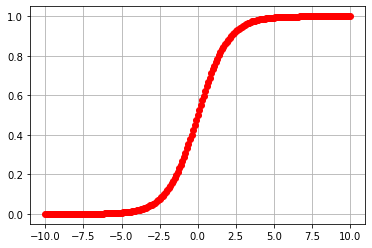

In [12]:
# 사각화
xx, yy = [], []
for k in range(-100,101):
    n = sigmoid(k/10)
    
    xx.append(k/10)
    yy.append(n)
    
plt.plot(xx,yy,'ro')
plt.grid(True)
plt.show()

In [13]:
# sigmoid : 2진 분류(Binary Classification,Logistic Regression) 모델의
#           활성화 함수(Activation Function)

In [14]:
# 04_logistic_regression_diabetes
# 당뇨병 진단 2진 분류 모델

import tensorflow as tf
import numpy as np
tf.random.set_seed(5)

In [19]:
# 데이터 불러오기
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
xy.shape     # (759, 9)

# 학습 데이터 분리 : 70%  , 531개

x_train = xy[:531,:-1]   # (531, 8)
y_train = xy[:531,[-1]]  # (531, 1)
print(x_train.shape)
print(y_train.shape)

# 검증 데이터 분리 : 30%  , 228개

x_test = xy[531:,:-1]
y_test = xy[531:,[-1]]
print(x_test.shape)      # (228, 8)
print(y_test.shape)      # (228, 1)

(531, 8)
(531, 1)
(228, 8)
(228, 1)


In [22]:
# 변수 초기화 : weight, bias
# (m,n)  *  (n.l) = (m,l) : 행렬의 내적 곱셈 공식
#   X    *   W    =  Y
# (531,8) * (8,1) = (531,1)
W = tf.Variable(tf.random.normal([8,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# W,b

(<tf.Variable 'weight:0' shape=(8, 1) dtype=float32, numpy=
 array([[-1.2405608 ],
        [ 1.6238999 ],
        [ 2.3377132 ],
        [-0.3933    ],
        [-0.3198626 ],
        [-0.578736  ],
        [ 1.4116361 ],
        [ 0.21565276]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.26303658], dtype=float32)>)

In [23]:
# 예측 함수 (hypothesis) : H(x) = sigmoid(tf.matmul(X,W) +  b)
# tf.sigmoid() : tf.div(1.,1. + tf.exp(-(tf.matmul(X,W) +  b)))
def hypothesis(X):
    return tf.sigmoid(tf.matmul(X,W) + b)  # 0과 1사이의 값이 출력

In [24]:
# 비용 함수 : logloss, 2진 분류 모델

def cost_func():
    cost = -tf.reduce_mean(y_train*tf.math.log(hypothesis(x_train)) + (1 - y_train) * tf.math.log(1-hypothesis(x_train)))
    return cost

In [25]:
# 경사 하강법
# learning_rate(학습율)을 0.01로 설정하여 optimizer 객체를 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
# 학습 시작
print('****** Start Learning !!')
for step in range(10001):
    # cost를 minimize한다
    optimizer.minimize(cost_func, var_list=[W,b])
    
    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
    
print('****** Start Finishing !!')

****** Start Learning !!
0000 cost:[ 0.83844167 ]  W: [[-1.2505602 ]
 [ 1.6139003 ]
 [ 2.3277173 ]
 [-0.40329936]
 [-0.32986206]
 [-0.58873516]
 [ 1.4016364 ]
 [ 0.20565315]]  b: [-0.25303686]
0100 cost:[ 0.6512142 ]  W: [[-1.2668486 ]
 [ 0.6304569 ]
 [ 1.3198674 ]
 [-0.75489783]
 [-0.6172613 ]
 [-1.4650154 ]
 [ 0.73573333]
 [-0.09529447]]  b: [-0.17573974]
0200 cost:[ 0.5707078 ]  W: [[-0.95218706]
 [-0.18397601]
 [ 0.6929621 ]
 [-0.7267798 ]
 [-0.5564836 ]
 [-2.0759149 ]
 [ 0.11384007]
 [-0.15706816]]  b: [-0.21374382]
0300 cost:[ 0.5312977 ]  W: [[-0.79754335]
 [-0.850645  ]
 [ 0.34528935]
 [-0.6078702 ]
 [-0.4946247 ]
 [-2.426916  ]
 [-0.32998988]
 [-0.14775254]]  b: [-0.17679456]
0400 cost:[ 0.511413 ]  W: [[-0.7455706 ]
 [-1.3955624 ]
 [ 0.190977  ]
 [-0.5213549 ]
 [-0.45407015]
 [-2.5976858 ]
 [-0.60122997]
 [-0.10524008]]  b: [-0.11607879]
0500 cost:[ 0.50058764 ]  W: [[-0.7323353 ]
 [-1.8402436 ]
 [ 0.14724319]
 [-0.48241904]
 [-0.41726968]
 [-2.6624675 ]
 [-0.7545706 ]
 [-0.0

5000 cost:[ 0.4866587 ]  W: [[-0.7646868 ]
 [-3.3311408 ]
 [ 0.24389678]
 [-0.54806817]
 [-0.21599841]
 [-2.5523174 ]
 [-0.8651078 ]
 [ 0.11381853]]  b: [0.3823999]
5100 cost:[ 0.48665863 ]  W: [[-0.76468664]
 [-3.3311408 ]
 [ 0.24389699]
 [-0.54806846]
 [-0.21599849]
 [-2.5523171 ]
 [-0.8651078 ]
 [ 0.11381838]]  b: [0.3823996]
5200 cost:[ 0.48665863 ]  W: [[-0.764687  ]
 [-3.331141  ]
 [ 0.24389686]
 [-0.54806834]
 [-0.21599823]
 [-2.5523171 ]
 [-0.8651075 ]
 [ 0.11381892]]  b: [0.38240007]
5300 cost:[ 0.4866587 ]  W: [[-0.76468647]
 [-3.331141  ]
 [ 0.24389699]
 [-0.54806864]
 [-0.21599816]
 [-2.552317  ]
 [-0.8651078 ]
 [ 0.11381869]]  b: [0.38239995]
5400 cost:[ 0.4866587 ]  W: [[-0.76468664]
 [-3.3311415 ]
 [ 0.24389677]
 [-0.5480683 ]
 [-0.21599786]
 [-2.552317  ]
 [-0.8651079 ]
 [ 0.11381865]]  b: [0.3824001]
5500 cost:[ 0.4866587 ]  W: [[-0.764687  ]
 [-3.3311417 ]
 [ 0.24389657]
 [-0.5480686 ]
 [-0.21599813]
 [-2.552317  ]
 [-0.8651081 ]
 [ 0.1138187 ]]  b: [0.38239992]
5600 

10000 cost:[ 0.48665863 ]  W: [[-0.7646866 ]
 [-3.3311443 ]
 [ 0.24389708]
 [-0.548067  ]
 [-0.21599764]
 [-2.552315  ]
 [-0.86510926]
 [ 0.11381868]]  b: [0.38240132]
****** Start Finishing !!


In [27]:
# 회귀계수, weight과 bias 출력
print('weight:', W.numpy())
print('bias:', b.numpy())

weight: [[-0.7646866 ]
 [-3.3311443 ]
 [ 0.24389708]
 [-0.548067  ]
 [-0.21599764]
 [-2.552315  ]
 [-0.86510926]
 [ 0.11381868]]
bias: [0.38240132]


In [33]:
# 정확도 측정 : accuracy computation
def predict(X):
    return tf.cast(hypothesis(X) > 0.5, dtype=tf.float32)  # 예측값을 0과 1로 변환

# 검증 데이터를 사용하여 예측 (70% : 30%)
preds = predict(x_test)
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds,y_test), dtype=tf.float32))

print('Accuracy:', accuracy.numpy())    # Accuracy: 0.78070176

Accuracy: 0.78070176
